# Preprocessing Data

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [ ]:
link_df = 'https://drive.google.com/uc?id=17uBRix6qfc60qBAsvsxHg63eT7hTK_oB'
df=pd.read_excel(link_df)

temp= pd.DataFrame({'date': pd.date_range('01/01/2017', periods=1581 , freq='D')})
temp['Year'] = temp.date.dt.year
df['Year'] = df['Year'] + 1

df_1 = pd.merge(temp, df, on='Year')
df_1.drop(columns='Year', inplace=True)
df_1['date'] = pd.to_datetime(df_1['date'])
df_1.set_index('date', inplace=True)
df_1

,Total Population
date,
2017-01-01,39071323
2017-01-02,39071323
2017-01-03,39071323
2017-01-04,39071323
2017-01-05,39071323
...,...
2021-04-26,39368078
2021-04-27,39368078
2021-04-28,39368078


In [ ]:
link_data = 'https://drive.google.com/uc?id=1S09XPYqYJmjlO6-PixldQOf16oTzf5t4'
data= pd.read_csv(link_data)

data['date']=pd.to_datetime(data['date'],format='%Y-%m-%d')
data.set_index('date', inplace=True)
data_1=data.sort_index().drop(['fips','deaths','new_confirmed_cases','new_deaths'],axis=1)
data_1.columns=['County','confirmed_cases']

data_1.head()

,County,confirmed_cases
date,,
2020-01-26,Yolo,0
2020-01-26,Alameda,0
2020-01-26,Calaveras,0
2020-01-26,Contra Costa,0
2020-01-26,Humboldt,0


In [ ]:
link_data2 = 'https://drive.google.com/uc?id=1uBnShqt8PiJEugTdAiJ7_nwLPkZ7Zt-c'
data2 = pd.read_excel(link_data2)

data2_1=data2.drop(["Flag Codes"],axis=1)
data2_2= data2_1.drop(data2_1.index[np.where(data2_1.index <684)[0]]).reset_index(drop=True)
date= pd.date_range('01/01/2017', periods=52, freq='D')
data2_2['TIME']=date.date

data2_2.columns=['Location','CCI','SUBJECT','MEASURE','FREQUENCY','date','Value']
data2_2['date']=pd.to_datetime(data2_2['date'],format='%Y-%m-%d')

date= pd.date_range('01/01/2017', periods=736, freq='D')
data2['date']=date.date
data2_2.set_index('date', inplace=True)
data2_2.head()

,Location,CCI,SUBJECT,MEASURE,FREQUENCY,Value
date,,,,,,
2017-01-01,USA,CCI,AMPLITUD,LTRENDIDX,M,1014572.0
2017-01-02,USA,CCI,AMPLITUD,LTRENDIDX,M,1014431.0
2017-01-03,USA,CCI,AMPLITUD,LTRENDIDX,M,101408.0
2017-01-04,USA,CCI,AMPLITUD,LTRENDIDX,M,1013625.0
2017-01-05,USA,CCI,AMPLITUD,LTRENDIDX,M,1012807.0


In [ ]:
link_data3 = 'https://drive.google.com/uc?id=1EJWH_UjGtrBO6fHi1lepdfkp5aarGlPr'
data3=pd.read_excel(link_data3)

date= pd.date_range('01/01/2006', periods=5930, freq='D')
data3['Date']= date.date
data3.columns=['date','Median Family Income(California) t-1']

data3['date']=pd.to_datetime(data3['date'])
data3.set_index('date', inplace=True)
data3.head()

,Median Family Income(California) t-1
date,
2006-01-01,80.675
2006-01-02,80.675
2006-01-03,80.675
2006-01-04,80.675
2006-01-05,80.675


In [ ]:
link_data4 = 'https://drive.google.com/uc?id=1tHOj9FV_VIli2RM1mcrfRZ-9hh4jmktO'
data4 = pd.read_excel(link_data4)

date= pd.date_range('01/01/2006', periods=5930, freq='D')
data4['Date']= date.date
data4.columns=['date','Median Household Income(California) t-1']

data4['date']=pd.to_datetime(data4['date'])
data4.set_index('date', inplace=True)

data4.head()

,Median Household Income(California) t-1
date,
2006-01-01,70.378
2006-01-02,70.378
2006-01-03,70.378
2006-01-04,70.378
2006-01-05,70.378


In [ ]:
link_data5 = 'https://drive.google.com/uc?id=15S2d6H1xOGgDWpTs_66KmmOBoahKqMtH'
data5=pd.read_excel(link_data5)

data5.columns=['Year','Total Crime']
data5_new={'Year':[2020],
         'Total Crime':[np.nan]}
data_2020 = pd.DataFrame(data5_new,columns=['Year','Total Crime'])
data_2020 = pd.concat([data_2020]*121, ignore_index=True)
data_2020_1 =data_2020.fillna(0)
data5= pd.concat([data5]*365, ignore_index=True)
data5=data5.sort_values('Year')
data5_1 = data5.append(data_2020_1)

data5_1['Year']=pd.to_datetime(data5_1['Year'])
date= pd.date_range('01/01/2017', periods=1581, freq='D')
data5_1['Year']= date.date
data5_1.columns=['date','Total Crime t-1']
data5_1.set_index('date', inplace=True)

data5.head()

,Year,Total Crime
0,2016,600021.87
356,2016,600021.87
928,2016,600021.87
352,2016,600021.87
932,2016,600021.87


In [ ]:
link_f1 = 'https://drive.google.com/uc?id=1xkjpCfygXtLsKA3GtDs7Wqpb9o519Ppk'
f1 = pd.read_csv(link_f1)

f1=f1.iloc[168:]
f1['DATE']=pd.to_datetime(f1['DATE'])
date= pd.date_range('01/01/2017', periods=17, freq='D')
f1['DATE']= date.date
f1.columns=['date','CASTHPI']
f1.set_index('date', inplace=True)

f1.head()

,CASTHPI
date,
2017-01-01,581.12
2017-01-02,593.41
2017-01-03,605.05
2017-01-04,613.95
2017-01-05,624.58


In [ ]:
result2 = pd.merge(data_1,df_1,left_index=True,right_index=True,how='outer')

result2

,County,confirmed_cases,Total Population
date,,,
2017-01-01,NaN,NaN,39071323.0
2017-01-02,NaN,NaN,39071323.0
2017-01-03,NaN,NaN,39071323.0
2017-01-04,NaN,NaN,39071323.0
2017-01-05,NaN,NaN,39071323.0
...,...,...,...
2021-06-05,Sacramento,106714.0,NaN
2021-06-05,Riverside,300929.0,NaN
2021-06-05,Plumas,733.0,NaN


In [ ]:
result3 = pd.concat([data2_2,data3,data4,data5_1,f1],axis=1)
result3_1 = result3.iloc[4018:]
result3_1

,Location,CCI,SUBJECT,MEASURE,FREQUENCY,Value,Median Family Income(California) t-1,Median Household Income(California) t-1,Total Crime t-1,CASTHPI
date,,,,,,,,,,
2017-01-01,USA,CCI,AMPLITUD,LTRENDIDX,M,1014572.0,82.415,72.167,600021.87,581.12
2017-01-02,USA,CCI,AMPLITUD,LTRENDIDX,M,1014431.0,82.415,72.167,600021.87,593.41
2017-01-03,USA,CCI,AMPLITUD,LTRENDIDX,M,101408.0,82.415,72.167,600021.87,605.05
2017-01-04,USA,CCI,AMPLITUD,LTRENDIDX,M,1013625.0,82.415,72.167,600021.87,613.95
2017-01-05,USA,CCI,AMPLITUD,LTRENDIDX,M,1012807.0,82.415,72.167,600021.87,624.58
...,...,...,...,...,...,...,...,...,...,...
2022-03-23,NaN,NaN,NaN,NaN,NaN,NaN,90.100,75.235,NaN,NaN
2022-03-24,NaN,NaN,NaN,NaN,NaN,NaN,90.100,75.235,NaN,NaN
2022-03-25,NaN,NaN,NaN,NaN,NaN,NaN,90.100,75.235,NaN,NaN


In [ ]:
final_result=pd.merge(result2,result3_1,left_index=True,right_index=True,how='outer')
final_result=final_result.drop(['County','Location','CCI','SUBJECT','MEASURE','FREQUENCY'],axis=1)
final_result.columns=['confirmed_cases', 'Population t-1', 'CCI fillna', 'Median Family Income(California) t-1','Median Household Income(California) t-1','Total Crime t-1','CASTHPI']
final_result=final_result.iloc[:25222]
final_result['confirmed_cases'] = final_result['confirmed_cases'].fillna(0)
final_result['CCI fillna'] = final_result['CCI fillna'].fillna(final_result['CCI fillna'].mean())
final_result['CASTHPI'] = final_result['CASTHPI'].fillna(final_result['CASTHPI'].mean())

final_result

,confirmed_cases,Population t-1,CCI fillna,Median Family Income(California) t-1,Median Household Income(California) t-1,Total Crime t-1,CASTHPI
date,,,,,,,
2017-01-01,0.0,39071323.0,1.014572e+06,82.415,72.167,600021.87,581.120000
2017-01-02,0.0,39071323.0,1.014431e+06,82.415,72.167,600021.87,593.410000
2017-01-03,0.0,39071323.0,1.014080e+05,82.415,72.167,600021.87,605.050000
2017-01-04,0.0,39071323.0,1.013625e+06,82.415,72.167,600021.87,613.950000
2017-01-05,0.0,39071323.0,1.012807e+06,82.415,72.167,600021.87,624.580000
...,...,...,...,...,...,...,...
2021-04-30,72478.0,39368078.0,3.092162e+06,87.100,78.002,0.00,648.835294
2021-04-30,21192.0,39368078.0,3.092162e+06,87.100,78.002,0.00,648.835294
2021-04-30,41477.0,39368078.0,3.092162e+06,87.100,78.002,0.00,648.835294


# Create Model

In [ ]:
final_result.corr()

,confirmed_cases,Population t-1,CCI fillna,Median Family Income(California) t-1,Median Household Income(California) t-1,Total Crime t-1,CASTHPI
confirmed_cases,1.000000e+00,1.989973e-01,7.735429e-19,-1.803639e-01,-1.286819e-01,-2.402698e-01,-3.523486e-17
Population t-1,1.989973e-01,1.000000e+00,2.214857e-18,-9.183743e-01,-8.362587e-01,-8.449043e-01,1.204855e-16
CCI fillna,7.735429e-19,2.214857e-18,1.000000e+00,-3.591996e-17,-2.400655e-17,-6.209466e-18,2.302686e-03
Median Family Income(California) t-1,-1.803639e-01,-9.183743e-01,-3.591996e-17,1.000000e+00,9.604381e-01,7.442277e-01,-4.714138e-16
Median Household Income(California) t-1,-1.286819e-01,-8.362587e-01,-2.400655e-17,9.604381e-01,1.000000e+00,5.373731e-01,-6.591713e-16
Total Crime t-1,-2.402698e-01,-8.449043e-01,-6.209466e-18,7.442277e-01,5.373731e-01,1.000000e+00,1.605780e-16
CASTHPI,-3.523486e-17,1.204855e-16,2.302686e-03,-4.714138e-16,-6.591713e-16,1.605780e-16,1.000000e+00


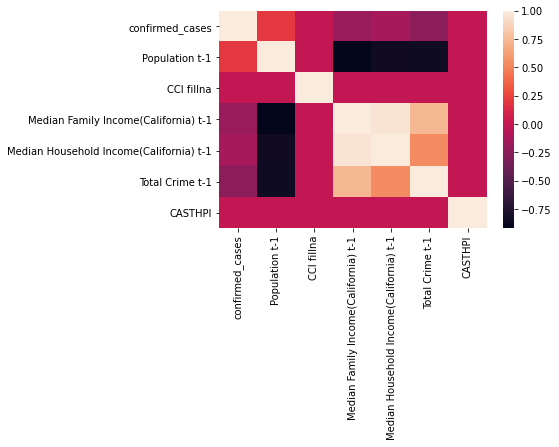

In [ ]:
sns.heatmap(final_result.corr())

In [ ]:
# split data
X = final_result.drop(columns='CASTHPI')
y = final_result.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model = XGBRegressor()
model.fit(X_train, y_train)

[01:28:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 1.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000


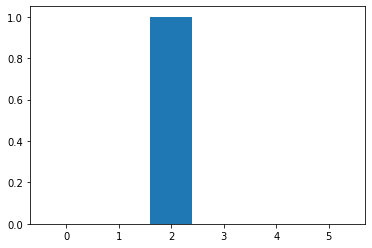

In [ ]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# evaluate predictions
accuracy = r2_score(y_test, predictions)
print("R2\t: %.2f%%" % (accuracy * 100.0))
accuracy = mean_squared_error(y_test, predictions)
print("RMSE\t: %.2f" %accuracy**(1/2))
accuracy = mean_absolute_error(y_test, predictions)
print("MAE\t: %.2f" %accuracy**(1/2))

R2	: -48.02%
RMSE	: 0.53
MAE	: 0.42


In [ ]:
# comparison dataframe of y_test and y_pred
df_pred = pd.DataFrame({'y_test':y_test, 'y_pred': y_pred})
df_pred

,y_test,y_pred
date,,
2020-10-13,648.835294,648.818848
2019-08-30,648.835294,648.818848
2020-12-14,648.835294,648.818848
2020-05-18,648.835294,648.818848
2019-08-22,648.835294,648.818848
...,...,...
2020-12-20,648.835294,648.818848
2020-11-07,648.835294,648.818848
2020-03-24,648.835294,648.818848
